In [57]:
import pandas as pd
import numpy as np
import seaborn as snb
import matplotlib.pyplot as plt
df = pd.read_csv('tweets_2018_lite.csv',lineterminator='\n')
df.head()

,id_str,created_at,full_text,user.id_str,user.screen_name,user.name,user.created_at,user.description,user.profile_image_url,user.profile_banner_url,user.url,user.statuses_count,user.followers_count,user.friends_count
0,953749974365474821,2018-01-17 22:04:48+00:00,"[ Luke Mitchell y Amber Heard, chillando. http...",861511449776201728,StuartBlxck,╾ Sᴛᴜᴀʀᴛ 𝐅𝐂 𝐀𝐔!,2017-05-08 09:21:50+00:00,⌖ 𝙴𝚡 𝙲𝚎𝚛𝚋𝚎𝚛𝚞𝚜 𝙰𝚐𝚎𝚗𝚝. ╮ 𝘽𝙔𝙍𝙉𝙀 𝑂’𝐶𝐴𝐿𝐿𝐴𝐺𝐻𝐴𝑁 ₁/₅ ◣...,http://pbs.twimg.com/profile_images/1383461196...,https://pbs.twimg.com/profile_banners/86151144...,https://t.co/ZWO1FYzQY8,26571,1075,458
1,953741174321197056,2018-01-17 21:29:50+00:00,I’ve seen this so many times on tumblr and it’...,546158471,peachiemo,m,2012-04-05 17:52:19+00:00,✨ titties out for twice✨ she/her/hers,http://pbs.twimg.com/profile_images/1260291512...,https://pbs.twimg.com/profile_banners/54615847...,NaN,38604,534,472
2,953736042456248322,2018-01-17 21:09:26+00:00,@stirgussa @Jia_S_ @AuthorNDSettemi @Agnieszka...,811853284113780736,DazzlingMaria_,Maria,2016-12-22 08:38:01+00:00,Life is about breaking our personal limits and...,http://pbs.twimg.com/profile_images/1261350465...,https://pbs.twimg.com/profile_banners/81185328...,NaN,910,101,101
3,953692484886061056,2018-01-17 18:16:21+00:00,Etats-Unis: Amber Heard et Elon Musk ont remis...,2999860517,SuisseSUI,Actualités Suisse,2015-01-26 16:04:41+00:00,"Actualité monde, politique, société, santé - ...",http://pbs.twimg.com/profile_images/6082358861...,https://pbs.twimg.com/profile_banners/29998605...,NaN,326471,3496,318
4,953689278097383425,2018-01-17 18:03:37+00:00,amber heard | icons ɞ https://t.co/5Cdl3AfVEG,715387794449780737,fivecolorsicons,ೃ✧.҅ ғıvеcоlогѕ,2016-03-31 03:58:36+00:00,°•°•°•° follow to not lose any post guys!\n❀ p...,http://pbs.twimg.com/profile_images/8251315957...,https://pbs.twimg.com/profile_banners/71538779...,https://t.co/00Z51Avp2f,1632,28,35


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37186 entries, 0 to 37185
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id_str                   37186 non-null  int64 
 1   created_at               37186 non-null  object
 2   full_text                37186 non-null  object
 3   user.id_str              37186 non-null  int64 
 4   user.screen_name         37186 non-null  object
 5   user.name                37166 non-null  object
 6   user.created_at          37186 non-null  object
 7   user.description         32377 non-null  object
 8   user.profile_image_url   37170 non-null  object
 9   user.profile_banner_url  32724 non-null  object
 10  user.url                 18328 non-null  object
 11  user.statuses_count      37186 non-null  int64 
 12  user.followers_count     37186 non-null  int64 
 13  user.friends_count       37186 non-null  int64 
dtypes: int64(5), object(9)
memory usage: 4

In [59]:
df["user.created_at"] = df["user.created_at"].astype(str).str.split("+").str[0]
df["created_at"] = df["created_at"].astype(str).str.split("+").str[0]
my_format = '%Y-%m-%d %H:%M:%S'
df['user.created_at'] = pd.to_datetime(df['user.created_at'], format=my_format)
df['created_at'] = pd.to_datetime(df['created_at'], format=my_format)

In [60]:
def tweet_usr_date_time(df):
    df['tweet_date'] = df.created_at.astype(str).str.split(" ").str[0]
    df['tweet_time'] = df.created_at.astype(str).str.split(" ").str[1]
    df['user_create_date'] = df["user.created_at"].astype(str).str.split(" ").str[0]
    df['user_create_time'] = df["user.created_at"].astype(str).str.split(" ").str[1]
    df = df.reset_index(drop=True)
    return df
tweet_usr_date_time(df)

,id_str,created_at,full_text,user.id_str,user.screen_name,user.name,user.created_at,user.description,user.profile_image_url,user.profile_banner_url,user.url,user.statuses_count,user.followers_count,user.friends_count,tweet_date,tweet_time,user_create_date,user_create_time
0,953749974365474821,2018-01-17 22:04:48,"[ Luke Mitchell y Amber Heard, chillando. http...",861511449776201728,StuartBlxck,╾ Sᴛᴜᴀʀᴛ 𝐅𝐂 𝐀𝐔!,2017-05-08 09:21:50,⌖ 𝙴𝚡 𝙲𝚎𝚛𝚋𝚎𝚛𝚞𝚜 𝙰𝚐𝚎𝚗𝚝. ╮ 𝘽𝙔𝙍𝙉𝙀 𝑂’𝐶𝐴𝐿𝐿𝐴𝐺𝐻𝐴𝑁 ₁/₅ ◣...,http://pbs.twimg.com/profile_images/1383461196...,https://pbs.twimg.com/profile_banners/86151144...,https://t.co/ZWO1FYzQY8,26571,1075,458,2018-01-17,22:04:48,2017-05-08,09:21:50
1,953741174321197056,2018-01-17 21:29:50,I’ve seen this so many times on tumblr and it’...,546158471,peachiemo,m,2012-04-05 17:52:19,✨ titties out for twice✨ she/her/hers,http://pbs.twimg.com/profile_images/1260291512...,https://pbs.twimg.com/profile_banners/54615847...,NaN,38604,534,472,2018-01-17,21:29:50,2012-04-05,17:52:19
2,953736042456248322,2018-01-17 21:09:26,@stirgussa @Jia_S_ @AuthorNDSettemi @Agnieszka...,811853284113780736,DazzlingMaria_,Maria,2016-12-22 08:38:01,Life is about breaking our personal limits and...,http://pbs.twimg.com/profile_images/1261350465...,https://pbs.twimg.com/profile_banners/81185328...,NaN,910,101,101,2018-01-17,21:09:26,2016-12-22,08:38:01
3,953692484886061056,2018-01-17 18:16:21,Etats-Unis: Amber Heard et Elon Musk ont remis...,2999860517,SuisseSUI,Actualités Suisse,2015-01-26 16:04:41,"Actualité monde, politique, société, santé - ...",http://pbs.twimg.com/profile_images/6082358861...,https://pbs.twimg.com/profile_banners/29998605...,NaN,326471,3496,318,2018-01-17,18:16:21,2015-01-26,16:04:41
4,953689278097383425,2018-01-17 18:03:37,amber heard | icons ɞ https://t.co/5Cdl3AfVEG,715387794449780737,fivecolorsicons,ೃ✧.҅ ғıvеcоlогѕ,2016-03-31 03:58:36,°•°•°•° follow to not lose any post guys!\n❀ p...,http://pbs.twimg.com/profile_images/8251315957...,https://pbs.twimg.com/profile_banners/71538779...,https://t.co/00Z51Avp2f,1632,28,35,2018-01-17,18:03:37,2016-03-31,03:58:36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37181,1074328123246764034,2018-12-16 15:39:19,ครั้งหนึ่งความรักของ Johny Depp กับ Amber Hear...,3313888159,Universalrevi3w,รีวิวเรื่อยเปื่อย,2015-08-13 00:49:57,เพจรีวิวเรื่อยเปื่อย,http://pbs.twimg.com/profile_images/8491402799...,https://pbs.twimg.com/profile_banners/33138881...,https://t.co/7u4e1xoS3B,27710,2795,169,2018-12-16,15:39:19,2015-08-13,00:49:57
37182,1074327392196251650,2018-12-16 15:36:24,"Favorit q sepanjang film, mb Mera aka Amber He...",85278001,Gibrannochigaro,ZsaZsa Utari Stan Account,2009-10-26 09:36:38,Masyarakat Sehat | Ulas Jersey on youtube | gi...,http://pbs.twimg.com/profile_images/1366093275...,https://pbs.twimg.com/profile_banners/85278001...,https://t.co/CFNyF2Kbvf,100411,798,725,2018-12-16,15:36:24,2009-10-26,09:36:38
37183,1074327147119038465,2018-12-16 15:35:26,"leo lins faz entrevista com a amber heard, faz...",2993861138,laliwithvanilla,l a l i ‎✵,2015-01-23 23:14:39,she/her | | | infp | | | 20,http://pbs.twimg.com/profile_images/1386477462...,https://pbs.twimg.com/profile_banners/29938611...,https://t.co/a1HSZ4hV14,10783,303,338,2018-12-16,15:35:26,2015-01-23,23:14:39
37184,1074325999146348544,2018-12-16 15:30:52,Rp amber heard ayo mendekat,940533309020368896,hellaintgood,Karl,2017-12-12 10:46:29,(𝐑𝐏/𝐅𝐋) manners maketh man.,http://pbs.twimg.com/profile_images/1326146370...,https://pbs.twimg.com/profile_banners/94053330...,NaN,43615,1179,976,2018-12-16,15:30:52,2017-12-12,10:46:29


In [61]:
df['tweet_date'] = pd.to_datetime(df['tweet_date'])
df['tweet_time'] = pd.to_datetime(df['tweet_time'])
df['user_create_date'] = pd.to_datetime(df['user_create_date'])
df['user_create_time'] = pd.to_datetime(df['user_create_time'])

# Investigation about Tweets count over time

<AxesSubplot:>

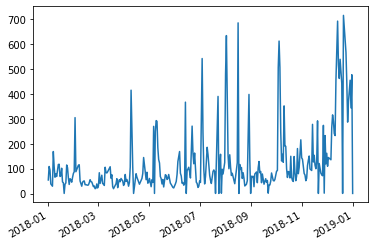

In [62]:
df['tweet_date'].value_counts().plot()

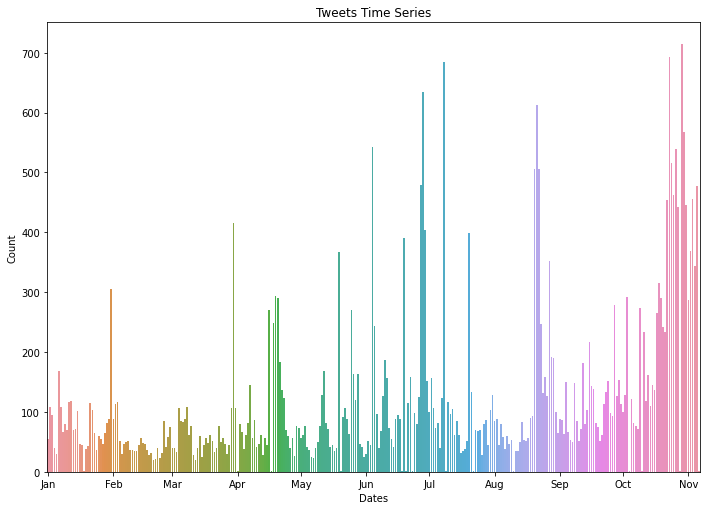

In [63]:
import matplotlib.dates as mdates
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
snb.countplot(x = 'tweet_date', data = df)
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
#plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.xlabel('Dates')
plt.ylabel('Count')
plt.title('Tweets Time Series')
plt.show()

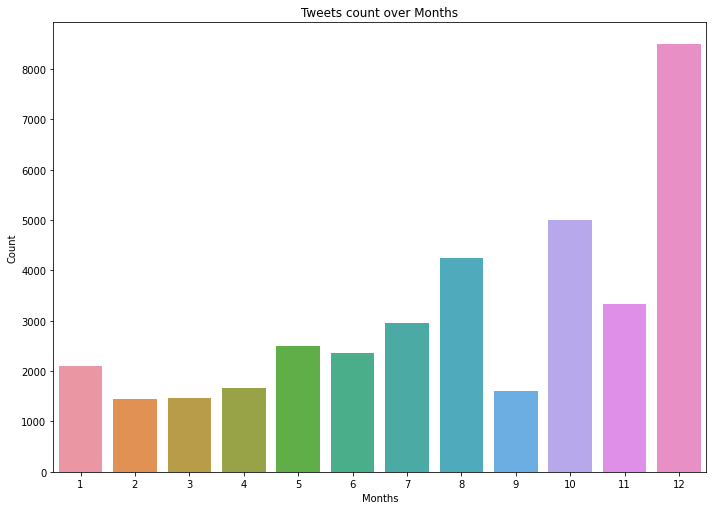

In [64]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
snb.countplot(x = df['tweet_date'].dt.month, data = df)
plt.xlabel('Months')
plt.ylabel('Count')
plt.title('Tweets count over Months')
plt.show()

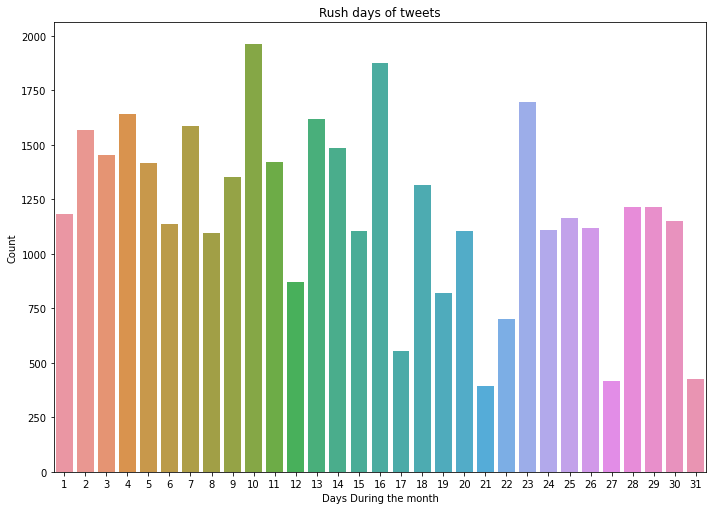

In [65]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
snb.countplot(x = df['tweet_date'].dt.day, data = df)
plt.xlabel('Days During the month')
plt.ylabel('Count')
plt.title('Rush days of tweets')
plt.show()

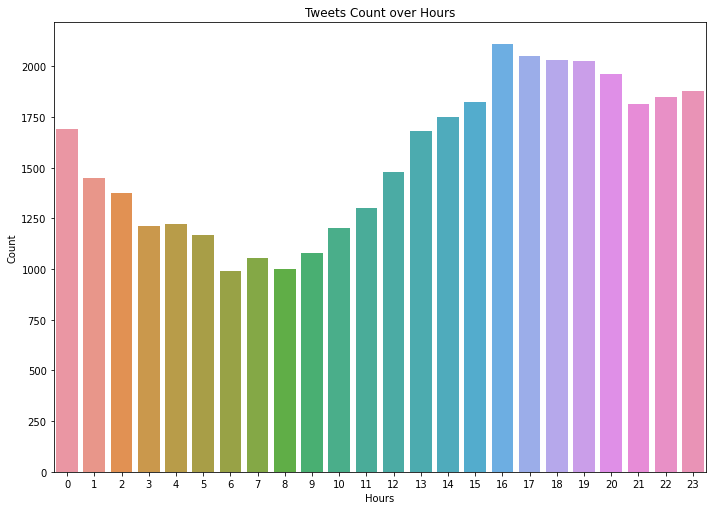

In [66]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
snb.countplot(x = df['tweet_time'].dt.hour, data = df)
plt.xlabel('Hours')
plt.ylabel('Count')
plt.title('Tweets Count over Hours')
plt.show()

# Investigation on users Created Over Time

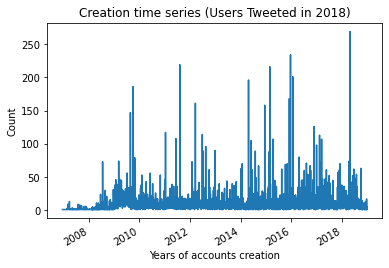

In [67]:
df['user_create_date'].value_counts().plot()
plt.xlabel('Years of accounts creation')
plt.ylabel('Count')
plt.title('Creation time series (Users Tweeted in 2018)');

In [68]:
users_cre_18 = df[df['user_create_date'].dt.year == 2018]

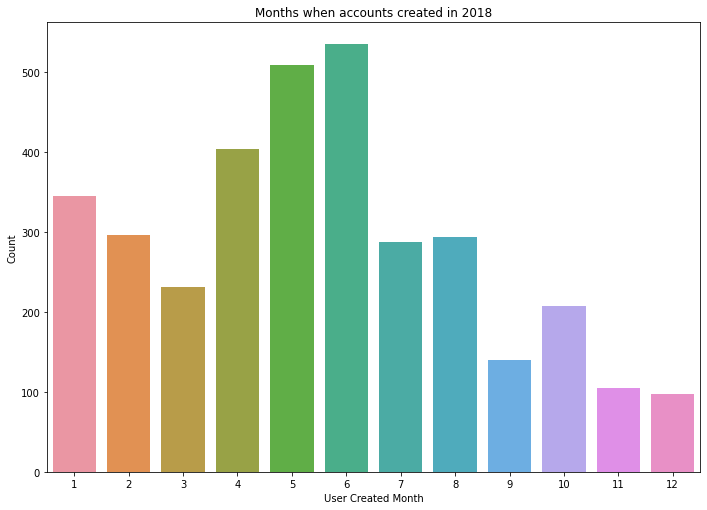

In [69]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
snb.countplot(x = users_cre_18['user_create_date'].dt.month, data = df)
plt.xlabel('User Created Month')
plt.ylabel('Count')
plt.title('Months when accounts created in 2018')
plt.show()

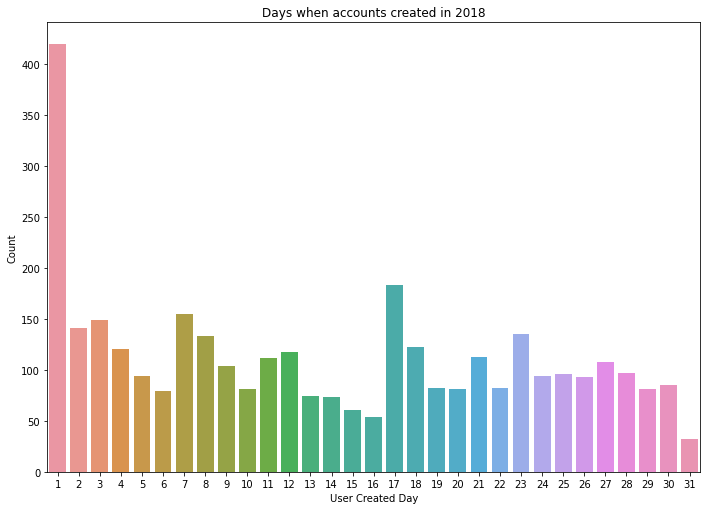

In [70]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
snb.countplot(x = users_cre_18['user_create_date'].dt.day, data = df)
plt.xlabel('User Created Day')
plt.ylabel('Count')
plt.title('Days when accounts created in 2018')

plt.show()

# Investigate tweets of Users created at 2018

In [71]:
users_cre_18

,id_str,created_at,full_text,user.id_str,user.screen_name,user.name,user.created_at,user.description,user.profile_image_url,user.profile_banner_url,user.url,user.statuses_count,user.followers_count,user.friends_count,tweet_date,tweet_time,user_create_date,user_create_time
326,951970522014855168,2018-01-13 00:13:53,@aquawomxn as Amber Heard https://t.co/lqh31sqK7A,951966857514405888,jlsawards,jls awards,2018-01-12 23:59:20,award do squad dos maiores marvetes já existen...,http://pbs.twimg.com/profile_images/9519678622...,https://pbs.twimg.com/profile_banners/95196685...,NaN,104,19,29,2018-01-13,2021-06-29 00:13:53,2018-01-12,2021-06-29 23:59:20
459,954352756575358976,2018-01-19 14:00:02,@wjldflowcr Uh. I’ve been in love with Amber H...,953459878563057664,sinangeIs,Allison.,2018-01-17 02:52:04,⠀⠀⠀ ⠀⠀⠀ ⠀⠀ ⠀⠀⠀ ⠀⠀ ⠀⠀ ⠀⠀⠀ ⠀ ⠀⠀⠀ ⠀⠀ ⠀⠀⠀ ⠀⠀⠀ ⠀⠀ ⠀...,http://pbs.twimg.com/profile_images/9577797829...,https://pbs.twimg.com/profile_banners/95345987...,NaN,74,19,25,2018-01-19,2021-06-29 14:00:02,2018-01-17,2021-06-29 02:52:04
464,954481261141282817,2018-01-19 22:30:40,Amber Heard x Margot Robbie https://t.co/IX6LE...,953616883583942656,nolscy,jane lane,2018-01-17 13:15:57,❣️harley’s musing shit❣️ ( @nosvrprises ),http://pbs.twimg.com/profile_images/9620349803...,https://pbs.twimg.com/profile_banners/95361688...,https://t.co/AOE1uC82f7,493,13,18,2018-01-19,2021-06-29 22:30:40,2018-01-17,2021-06-29 13:15:57
478,954432708708655104,2018-01-19 19:17:44,Amber Heard The Art of Elysium event in Santa ...,951870806912577536,ClnDigital,CLN Digital,2018-01-12 17:37:40,NaN,http://abs.twimg.com/sticky/default_profile_im...,NaN,NaN,509,0,10,2018-01-19,2021-06-29 19:17:44,2018-01-12,2021-06-29 17:37:40
507,953218951235981313,2018-01-16 10:54:42,Amber Heard and Elon Musk Caught Dancing the N...,947980200058458112,thecelebdiary2,thecelebdiary,2018-01-01 23:57:47,Hollywood and bollywood news diary,http://pbs.twimg.com/profile_images/9479807586...,https://pbs.twimg.com/profile_banners/94798020...,https://t.co/G8wDlghcs2,35722,98,2,2018-01-16,2021-06-29 10:54:42,2018-01-01,2021-06-29 23:57:47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37135,1074291000598646784,2018-12-16 13:11:48,AMBER HEARD &lt;3,1068136514087878656,asdfgabhjkl01,gabbyyy,2018-11-29 13:36:04,🏸,http://pbs.twimg.com/profile_images/1375826259...,https://pbs.twimg.com/profile_banners/10681365...,https://t.co/Ca7BgTigZS,5397,918,929,2018-12-16,2021-06-29 13:11:48,2018-11-29,2021-06-29 13:36:04
37143,1074285316935012353,2018-12-16 12:49:13,AQUAMAN Review:\n\nNot Only DC Fans AQUAMAN Is...,1063318878468562944,Vijayvinash2217,Vijay Vinash,2018-11-16 06:32:30,THALAPATHY DEVOTE..🙏\nMSD FAN.. 😘,http://pbs.twimg.com/profile_images/1226865419...,https://pbs.twimg.com/profile_banners/10633188...,NaN,79,8,18,2018-12-16,2021-06-29 12:49:13,2018-11-16,2021-06-29 06:32:30
37145,1074283992692604928,2018-12-16 12:43:57,//amber heard's so pretty!!,994338866277462016,zhichue,sooya 🤍,2018-05-09 22:10:34,BLACKPINK cause we in your area. ー Kim Jisoo t...,http://pbs.twimg.com/profile_images/1364946085...,https://pbs.twimg.com/profile_banners/99433886...,https://t.co/c481xlcOXB,5841,310,163,2018-12-16,2021-06-29 12:43:57,2018-05-09,2021-06-29 22:10:34
37154,1074337701497856000,2018-12-16 16:17:22,There was literally a scene where Amber Heard ...,1031438736033243136,FutureVenomZone,Martin #WhiteBoySummer,2018-08-20 07:12:12,My lifelong dream is to be invited to the UK p...,http://pbs.twimg.com/profile_images/1386996027...,https://pbs.twimg.com/profile_banners/10314387...,NaN,34417,52,370,2018-12-16,2021-06-29 16:17:22,2018-08-20,2021-06-29 07:12:12


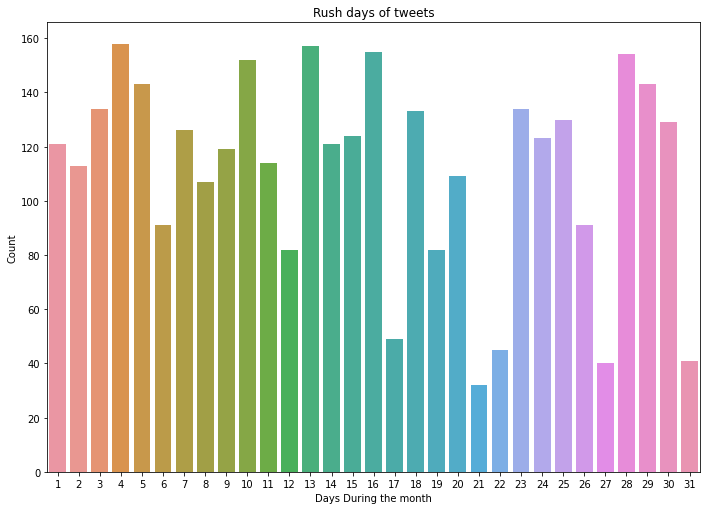

In [72]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
snb.countplot(x = users_cre_18['tweet_date'].dt.day, data = df)
plt.xlabel('Days During the month')
plt.ylabel('Count')
plt.title('Rush days of tweets')
plt.show()

In [73]:
users_cre_18['diff'] = abs(users_cre_18['user.created_at'] - users_cre_18['created_at'])
users_cre_18["days_diff"] = users_cre_18["diff"].astype(str).str.split(" ").str[0]
users_cre_18["time_diff"] = users_cre_18["diff"].astype(str).str.split(" ").str[2]
users_cre_18.drop(['diff'], axis=1, inplace=True)
users_cre_18['time_diff'] = pd.to_datetime(users_cre_18['time_diff'])
users_cre_18['days_diff'] = users_cre_18['days_diff'].astype(int)

<ipython-input-73-52de3f87bb74>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users_cre_18['diff'] = abs(users_cre_18['user.created_at'] - users_cre_18['created_at'])
<ipython-input-73-52de3f87bb74>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users_cre_18["days_diff"] = users_cre_18["diff"].astype(str).str.split(" ").str[0]
<ipython-input-73-52de3f87bb74>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

In [101]:
users_cre_18.head()

,id_str,created_at,full_text,user.id_str,user.screen_name,user.name,user.created_at,user.description,user.profile_image_url,user.profile_banner_url,user.url,user.statuses_count,user.followers_count,user.friends_count,tweet_date,tweet_time,user_create_date,user_create_time,days_diff,time_diff
326,951970522014855168,2018-01-13 00:13:53,@aquawomxn as Amber Heard https://t.co/lqh31sqK7A,951966857514405888,jlsawards,jls awards,2018-01-12 23:59:20,award do squad dos maiores marvetes já existen...,http://pbs.twimg.com/profile_images/9519678622...,https://pbs.twimg.com/profile_banners/95196685...,NaN,104,19,29,2018-01-13,2021-06-29 00:13:53,2018-01-12,2021-06-29 23:59:20,0,2021-06-29 00:14:33
459,954352756575358976,2018-01-19 14:00:02,@wjldflowcr Uh. I’ve been in love with Amber H...,953459878563057664,sinangeIs,Allison.,2018-01-17 02:52:04,⠀⠀⠀ ⠀⠀⠀ ⠀⠀ ⠀⠀⠀ ⠀⠀ ⠀⠀ ⠀⠀⠀ ⠀ ⠀⠀⠀ ⠀⠀ ⠀⠀⠀ ⠀⠀⠀ ⠀⠀ ⠀...,http://pbs.twimg.com/profile_images/9577797829...,https://pbs.twimg.com/profile_banners/95345987...,NaN,74,19,25,2018-01-19,2021-06-29 14:00:02,2018-01-17,2021-06-29 02:52:04,2,2021-06-29 11:07:58
464,954481261141282817,2018-01-19 22:30:40,Amber Heard x Margot Robbie https://t.co/IX6LE...,953616883583942656,nolscy,jane lane,2018-01-17 13:15:57,❣️harley’s musing shit❣️ ( @nosvrprises ),http://pbs.twimg.com/profile_images/9620349803...,https://pbs.twimg.com/profile_banners/95361688...,https://t.co/AOE1uC82f7,493,13,18,2018-01-19,2021-06-29 22:30:40,2018-01-17,2021-06-29 13:15:57,2,2021-06-29 09:14:43
478,954432708708655104,2018-01-19 19:17:44,Amber Heard The Art of Elysium event in Santa ...,951870806912577536,ClnDigital,CLN Digital,2018-01-12 17:37:40,NaN,http://abs.twimg.com/sticky/default_profile_im...,NaN,NaN,509,0,10,2018-01-19,2021-06-29 19:17:44,2018-01-12,2021-06-29 17:37:40,7,2021-06-29 01:40:04
507,953218951235981313,2018-01-16 10:54:42,Amber Heard and Elon Musk Caught Dancing the N...,947980200058458112,thecelebdiary2,thecelebdiary,2018-01-01 23:57:47,Hollywood and bollywood news diary,http://pbs.twimg.com/profile_images/9479807586...,https://pbs.twimg.com/profile_banners/94798020...,https://t.co/G8wDlghcs2,35722,98,2,2018-01-16,2021-06-29 10:54:42,2018-01-01,2021-06-29 23:57:47,14,2021-06-29 10:56:55


In [109]:
users_cre_18.groupby('days_diff')['user.id_str']

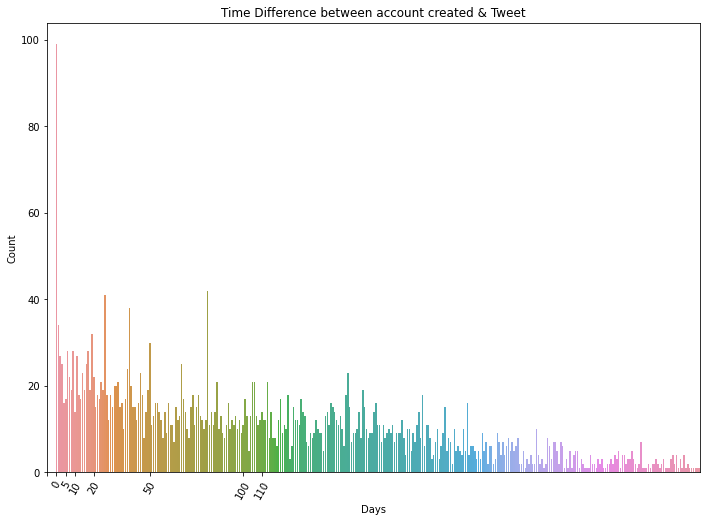

In [74]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
snb.countplot(x = 'days_diff', data = users_cre_18)

plt.xticks([ -5, 0,5,10,20,50,100,110],rotation=60)
plt.xlabel('Days')
plt.ylabel('Count')
plt.title('Time Difference between account created & Tweet')
plt.show()

<AxesSubplot:>

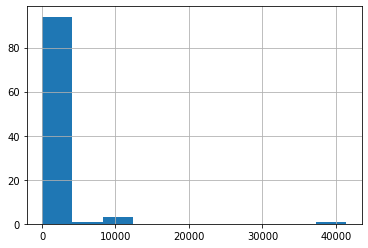

In [75]:
users_Zero_18 = users_cre_18[users_cre_18['days_diff'] == 0]
users_Zero_18['user.statuses_count'].hist()

In [76]:
users_Zero_18['time_diff_min'] = users_Zero_18['time_diff'].dt.hour * 60 + users_Zero_18['time_diff'].dt.minute
users_Zero_18

<ipython-input-76-bdb9578d2d10>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users_Zero_18['time_diff_min'] = users_Zero_18['time_diff'].dt.hour * 60 + users_Zero_18['time_diff'].dt.minute


,id_str,created_at,full_text,user.id_str,user.screen_name,user.name,user.created_at,user.description,user.profile_image_url,user.profile_banner_url,...,user.statuses_count,user.followers_count,user.friends_count,tweet_date,tweet_time,user_create_date,user_create_time,days_diff,time_diff,time_diff_min
326,951970522014855168,2018-01-13 00:13:53,@aquawomxn as Amber Heard https://t.co/lqh31sqK7A,951966857514405888,jlsawards,jls awards,2018-01-12 23:59:20,award do squad dos maiores marvetes já existen...,http://pbs.twimg.com/profile_images/9519678622...,https://pbs.twimg.com/profile_banners/95196685...,...,104,19,29,2018-01-13,2021-06-29 00:13:53,2018-01-12,2021-06-29 23:59:20,0,2021-06-29 00:14:33,14
1005,948135650695331840,2018-01-02 10:15:29,"@Westerns_SQ adelaide kane, crystal reed, rosi...",947988568432984064,abdietory,gerald,2018-01-02 00:31:02,how do I uninstall my personality,http://pbs.twimg.com/profile_images/9616099035...,https://pbs.twimg.com/profile_banners/94798856...,...,255,44,58,2018-01-02,2021-06-29 10:15:29,2018-01-02,2021-06-29 00:31:02,0,2021-06-29 09:44:27,584
1170,958169909992845312,2018-01-30 02:48:03,@aquawonderwoman as amber heard https://t.co/L...,958101362411278336,awardowney,golden downey awards,2018-01-29 22:15:40,essa eh a conta dos awards e outros eventos qu...,http://pbs.twimg.com/profile_images/9595760517...,https://pbs.twimg.com/profile_banners/95810136...,...,186,21,18,2018-01-30,2021-06-29 02:48:03,2018-01-29,2021-06-29 22:15:40,0,2021-06-29 04:32:23,272
1179,957219431784046592,2018-01-27 11:51:11,Amber Heard como Emma Jennings en Paranoia 💕 #...,956888051006963712,AmberHeardSpain,Amber Heard España ♀,2018-01-26 13:54:24,Cuenta dedicada a la talentosa actriz y activi...,http://pbs.twimg.com/profile_images/9568922358...,https://pbs.twimg.com/profile_banners/95688805...,...,175,288,34,2018-01-27,2021-06-29 11:51:11,2018-01-26,2021-06-29 13:54:24,0,2021-06-29 21:56:47,1316
1247,955950759736201221,2018-01-23 23:49:56,Amber Heard vs Johnny Depp\n7mil give away to ...,955838421355974658,fameshaming,fameshaming,2018-01-23 16:23:33,NaN,http://pbs.twimg.com/profile_images/9559696765...,NaN,...,18,0,96,2018-01-23,2021-06-29 23:49:56,2018-01-23,2021-06-29 16:23:33,0,2021-06-29 07:26:23,446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35863,1077682368956301312,2018-12-25 21:47:53,If Amber Heard was SO afraid of what Johnny De...,1077673902317416448,standinthe_rain,Viky,2018-12-25 21:14:15,nobody should accept anything but the truth,http://pbs.twimg.com/profile_images/1112462099...,https://pbs.twimg.com/profile_banners/10776739...,...,1009,108,36,2018-12-25,2021-06-29 21:47:53,2018-12-25,2021-06-29 21:14:15,0,2021-06-29 00:33:38,33
35867,1077679838474002432,2018-12-25 21:37:50,So no one finds it weird how despite claims th...,1077673902317416448,standinthe_rain,Viky,2018-12-25 21:14:15,nobody should accept anything but the truth,http://pbs.twimg.com/profile_images/1112462099...,https://pbs.twimg.com/profile_banners/10776739...,...,1009,108,36,2018-12-25,2021-06-29 21:37:50,2018-12-25,2021-06-29 21:14:15,0,2021-06-29 00:23:35,23
35868,1077679743900753921,2018-12-25 21:37:27,"hey, amber heard abused at least two people an...",1077673902317416448,standinthe_rain,Viky,2018-12-25 21:14:15,nobody should accept anything but the truth,http://pbs.twimg.com/profile_images/1112462099...,https://pbs.twimg.com/profile_banners/10776739...,...,1009,108,36,2018-12-25,2021-06-29 21:37:27,2018-12-25,2021-06-29 21:14:15,0,2021-06-29 00:23:12,23
35890,1077487100080123904,2018-12-25 08:51:58,i love you amber heard,1077485773363003392,arihara85874437,ariharan,2018-12-25 08:46:41,NaN,http://pbs.twimg.com/profile_images/1077486524...,https://pbs.twimg.com/profile_banners/10774857...,...,7,2,9,2018-12-25,2021-06-29 08:51:58,2018-12-25,2021-06-29 08:46:41,0,2021-06-29 00:05:17,5


In [77]:
users_Zero_18['Avg_tweet'] = users_Zero_18['user.statuses_count']/users_Zero_18['time_diff_min']


<ipython-input-77-1145ab8aa915>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users_Zero_18['Avg_tweet'] = users_Zero_18['user.statuses_count']/users_Zero_18['time_diff_min']


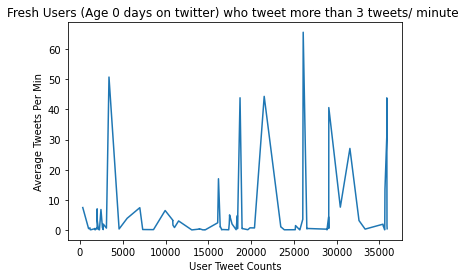

In [110]:
users_Zero_18['Avg_tweet'].plot()
plt.xlabel('User Tweet Counts')
plt.ylabel('Average Tweets Per Min')
plt.title('Fresh Users (Age 0 days on twitter) who tweet more than 3 tweets/ minute ')
plt.show()

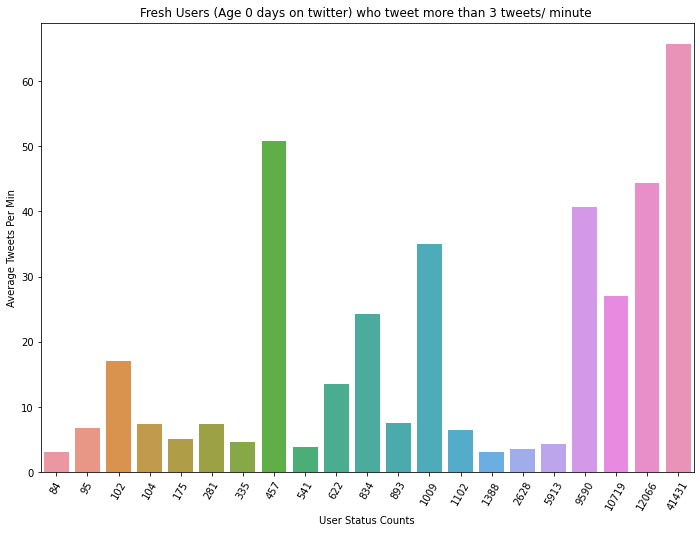

In [79]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
snb.barplot(x = 'user.statuses_count',y='Avg_tweet', data = users_Zero_18[users_Zero_18['Avg_tweet'] >= 3],ci=None)
plt.xticks(rotation=60)

plt.xlabel('User Status Counts')
plt.ylabel('Average Tweets Per Min')
plt.title('Fresh Users (Age 0 days on twitter) who tweet more than 3 tweets/ minute ')
plt.show()

In [128]:
users_Zero_18[users_Zero_18['Avg_tweet'] >= 3]['user.screen_name'].value_counts()

standinthe_rain    6
GodEmperor99       3
AmberHeardSpain    2
johnnyd15482425    2
BaltazaZee         2
pheonixfeather8    1
teamdepp_          1
guest99254156      1
ahearddaily        1
mskarinacook       1
MerCleodora        1
RuessSophie        1
kiarahopkinss      1
jlsawards          1
clairdalunes       1
sociamediaa        1
1535Joyce          1
EveSalander        1
jokerofturkey      1
Aceee66417542      1
shusreen           1
Name: user.screen_name, dtype: int64

In [80]:
df_0 = users_cre_18[users_cre_18['days_diff'] == 0]
df_1 = users_cre_18[users_cre_18['days_diff'] == 1]
df_2 = users_cre_18[users_cre_18['days_diff'] == 2]
df_3 = users_cre_18[users_cre_18['days_diff'] == 3]
df_4 = users_cre_18[users_cre_18['days_diff'] == 4]
df_5 = users_cre_18[users_cre_18['days_diff'] == 5]
df_6 = users_cre_18[users_cre_18['days_diff'] == 6]
df_7 = users_cre_18[users_cre_18['days_diff'] == 7]
df_8 = users_cre_18[users_cre_18['days_diff'] == 8]
df_9 = users_cre_18[users_cre_18['days_diff'] == 9]
df_10 = users_cre_18[users_cre_18['days_diff'] == 10]
frames = [df_0,df_1,df_2 ,df_3 ,df_4 ,df_5 ,df_6 ,df_7 ,df_8 ,df_9 ,df_10]
fresh_users = pd.concat(frames)
fresh_users['diff'] = abs(fresh_users['user.created_at'] - fresh_users['created_at'])
fresh_users["days_diff"] = fresh_users["diff"].astype(str).str.split(" ").str[0]
fresh_users["time_diff"] = fresh_users["diff"].astype(str).str.split(" ").str[2]
fresh_users.drop(['diff'], axis=1, inplace=True)
fresh_users['time_diff'] = pd.to_datetime(fresh_users['time_diff'])
fresh_users['days_diff'] = fresh_users['days_diff'].astype(int)
fresh_users

,id_str,created_at,full_text,user.id_str,user.screen_name,user.name,user.created_at,user.description,user.profile_image_url,user.profile_banner_url,user.url,user.statuses_count,user.followers_count,user.friends_count,tweet_date,tweet_time,user_create_date,user_create_time,days_diff,time_diff
326,951970522014855168,2018-01-13 00:13:53,@aquawomxn as Amber Heard https://t.co/lqh31sqK7A,951966857514405888,jlsawards,jls awards,2018-01-12 23:59:20,award do squad dos maiores marvetes já existen...,http://pbs.twimg.com/profile_images/9519678622...,https://pbs.twimg.com/profile_banners/95196685...,NaN,104,19,29,2018-01-13,2021-06-29 00:13:53,2018-01-12,2021-06-29 23:59:20,0,2021-06-29 00:14:33
1005,948135650695331840,2018-01-02 10:15:29,"@Westerns_SQ adelaide kane, crystal reed, rosi...",947988568432984064,abdietory,gerald,2018-01-02 00:31:02,how do I uninstall my personality,http://pbs.twimg.com/profile_images/9616099035...,https://pbs.twimg.com/profile_banners/94798856...,NaN,255,44,58,2018-01-02,2021-06-29 10:15:29,2018-01-02,2021-06-29 00:31:02,0,2021-06-29 09:44:27
1170,958169909992845312,2018-01-30 02:48:03,@aquawonderwoman as amber heard https://t.co/L...,958101362411278336,awardowney,golden downey awards,2018-01-29 22:15:40,essa eh a conta dos awards e outros eventos qu...,http://pbs.twimg.com/profile_images/9595760517...,https://pbs.twimg.com/profile_banners/95810136...,NaN,186,21,18,2018-01-30,2021-06-29 02:48:03,2018-01-29,2021-06-29 22:15:40,0,2021-06-29 04:32:23
1179,957219431784046592,2018-01-27 11:51:11,Amber Heard como Emma Jennings en Paranoia 💕 #...,956888051006963712,AmberHeardSpain,Amber Heard España ♀,2018-01-26 13:54:24,Cuenta dedicada a la talentosa actriz y activi...,http://pbs.twimg.com/profile_images/9568922358...,https://pbs.twimg.com/profile_banners/95688805...,https://t.co/gGfS9aOuHf,175,288,34,2018-01-27,2021-06-29 11:51:11,2018-01-26,2021-06-29 13:54:24,0,2021-06-29 21:56:47
1247,955950759736201221,2018-01-23 23:49:56,Amber Heard vs Johnny Depp\n7mil give away to ...,955838421355974658,fameshaming,fameshaming,2018-01-23 16:23:33,NaN,http://pbs.twimg.com/profile_images/9559696765...,NaN,NaN,18,0,96,2018-01-23,2021-06-29 23:49:56,2018-01-23,2021-06-29 16:23:33,0,2021-06-29 07:26:23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18969,1044384546966237184,2018-09-25 00:34:14,amber heard https://t.co/SvWFOnJJmq,1040505142527717376,jakegyllenheeal,mundinho michael shannon br,2018-09-14 07:38:52,nocturnal animals (2016),http://pbs.twimg.com/profile_images/1207836615...,https://pbs.twimg.com/profile_banners/10405051...,https://t.co/prIT20Xk2c,35331,1334,1219,2018-09-25,2021-06-29 00:34:14,2018-09-14,2021-06-29 07:38:52,10,2021-06-29 16:55:22
27760,1061231655363461120,2018-11-10 12:18:38,@mmargottstan @expectajag A amber heard (mulhe...,1057442364128681986,cabey0stan,Sapastê,2018-10-31 01:21:20,Vem na fuleragenzinha,http://pbs.twimg.com/profile_images/1060552144...,https://pbs.twimg.com/profile_banners/10574423...,https://t.co/5AzMJZ2p4t,690,412,598,2018-11-10,2021-06-29 12:18:38,2018-10-31,2021-06-29 01:21:20,10,2021-06-29 10:57:18
33465,1073384360714399745,2018-12-14 01:09:08,Acabo de ver aquaman de jasón momoa. Y es una ...,1069583038743494656,pipotribilin,pipotribilino,2018-12-03 13:24:03,simplemente yo,http://pbs.twimg.com/profile_images/1070310317...,https://pbs.twimg.com/profile_banners/10695830...,NaN,27,12,237,2018-12-14,2021-06-29 01:09:08,2018-12-03,2021-06-29 13:24:03,10,2021-06-29 11:45:05
34457,1073224787269509121,2018-12-13 14:35:03,Hay algo mas sexy que ver a Amber Heard de Mer...,1069583038743494656,pipotribilin,pipotribilino,2018-12-03 13:24:03,simplemente yo,http://pbs.twimg.com/profile_images/1070310317...,https://pbs.twimg.com/profile_banners/10695830...,NaN,27,12,237,2018-12-13,2021-06-29 14:35:03,2018-12-03,2021-06-29 13:24:03,10,2021-06-29 01:11:00


<AxesSubplot:>

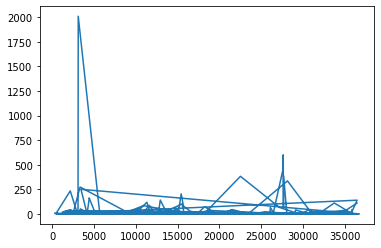

In [81]:
fresh_users['time_diff_min'] = fresh_users['time_diff'].dt.hour * 60 + fresh_users['time_diff'].dt.minute
fresh_users['Avg_tweet'] = fresh_users['user.statuses_count']/fresh_users['time_diff_min']
fresh_users['Avg_tweet'].plot()

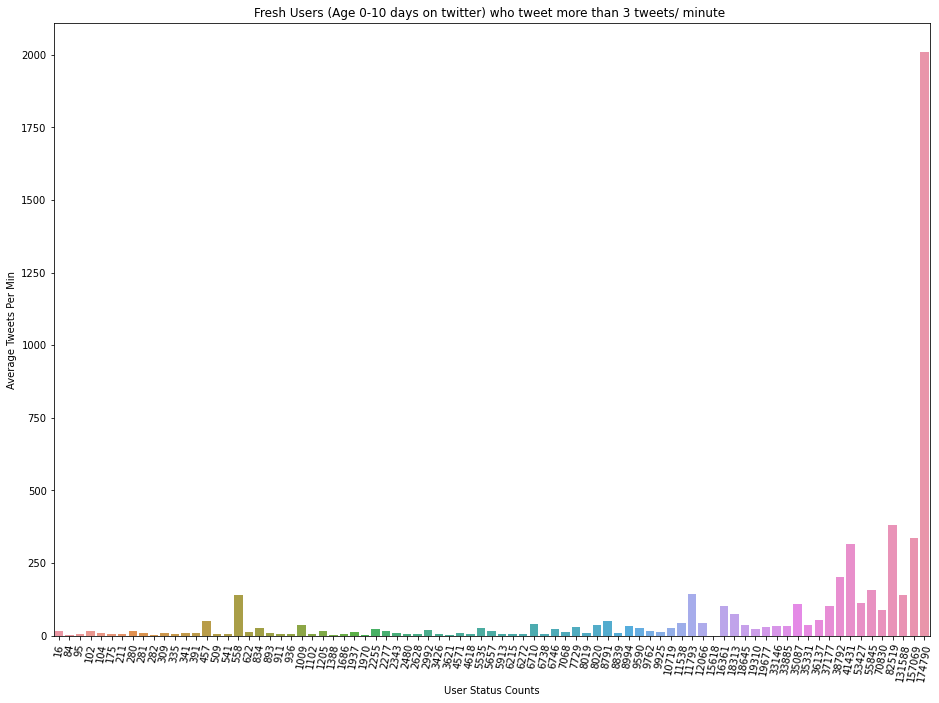

In [82]:
fig, ax = plt.subplots()
fig.set_size_inches(15.7, 11.27)
snb.barplot(x = 'user.statuses_count',y='Avg_tweet', data = fresh_users[fresh_users['Avg_tweet'] >= 3],ci=None)
plt.xticks(rotation=80)

plt.xlabel('User Status Counts')
plt.ylabel('Average Tweets Per Min')
plt.title('Fresh Users (Age 0-10 days on twitter) who tweet more than 3 tweets/ minute ')
plt.show()

In [83]:
fresh_users[fresh_users['Avg_tweet'] >= 3].shape[0]

115

### Number os users who made above 3 tweets / minute is 115

In [84]:
fresh_users.to_csv('fresh_users_high_avg_tweets_18.csv')